# Module 8 - Basic Simulations with GROMACS

<img src="https://www.gromacs.org/_static/gmx_logo_blue.png" width="600 px">

# Goals

- Learn how to setup and run basic MD simulations using GROMACS
- Learn how to do basic analysis of simulation trajectory data with GROMACS tools
- Learn about other tools such as MDTraj to analyze and visualize simulation trajectories

## Running a simulation in GROMACS

To run a simulation in GROMACS you need a *minimum* of 3 components:

- Structure file that has the starting positions (and sometimes velocities) of your system of interest. This is usully a .pdb (protein databank format) or .gro (GROMACS format) file
- Topology file(s) that describe the interatomic potential interactions. These are simple text files with .itp or .top extensions which describe the types of interactions (e.g., Lennard-Jones, electrostatics, bonds, etc.), number of molecules/atoms in the system, etc.
- MD parameters file (.mdp). This text file contains all the simulation parameters including the time step, number of steps, integration algorithm, temperature, pressure, etc.

### The structure file (.pdb)

A .pdb file is a simple text file that contains information about the simulation cell size, positions of atoms, names of residues, and much more (see here https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html for a detailed description). For our simple Argon system the .pdb file looks like this (`Ar_6x6x6_100K.pdb`):

```
TITLE     Argon Box
REMARK    THIS IS A SIMULATION BOX
CRYST1   37.376   37.376   37.376  90.00  90.00  90.00 P 1           1
MODEL        1
ATOM      1 Ar   MOL     1      17.786  30.596  12.259  1.00  0.00          Ar
ATOM      2 Ar   MOL     2       7.327  36.921  18.351  1.00  0.00          Ar
ATOM      3 Ar   MOL     3      25.365  11.849  17.463  1.00  0.00          Ar
.
.
.
ATOM    863 Ar   MOL   863       3.040  22.081   0.756  1.00  0.00          Ar
ATOM    864 Ar   MOL   864      33.744  19.657  35.316  1.00  0.00          Ar
TER
ENDMDL
```

### The topology files (.itp/.top)

GROMACS topology files contain the 'chemical' information about the system such as the number of molecules of a given species and how molecules interact with themselves and other molecules. This includes the types of interatomic non-bonded (e.g., Lennard-Jones and electrostatics) and bonded (e.g., harmonic bonds, angles, and dihedrals) potentials. Topology files normally have .itp and .top extenstions. A .itp file typically contains information about the chemical description of an individual molecule, which could be as simple as defining a single atom such as Ar or an ion such as sodium or chloride. However, it may also contain the description of very large macromolecules such as proteins that may have thousands of atoms. The .itp file that defines our Ar molecule looks like this (`argon.itp`):

```
[ defaults ]
1       2       yes     1.0     1.0

[ atomtypes ]
Ar      18      39.94800        0.000   A       0.34    0.9889744

[ moleculetype ]
MOL     2

[ atoms ]
1     Ar   1    MOL     Ar      1      0.0

(base) vanegasj@bb499x001:~/module08/gromacs$ cat argon.itp 
[ defaults ]
1       2       yes     1.0     1.0

[ atomtypes ]
Ar      18      39.94800        0.000   A       0.34    0.9889744

[ moleculetype ]
MOL     2

[ atoms ]
1     Ar   1    MOL     Ar      1      0.0
```

A .top file usually contains the complete description of the system including calls to individal .itp files, the number of molecules of each species, and the order in which they appear in the structure (.pdb) file. The .top file for our system looks like this (`topol.top`):

```
#include "argon.itp"

[system]
Argon

[molecules]
MOL 864
```

### The MD simulation parameters file (.mdp)

The parameters for running an MD simulation in GROMACS are specified in a simple text file with an .mdp extension. The format is simple with individual keywords specified in each line followed by an equal sign and the corresponding value. Comments start with a semicolon. The contents of the .mdp file for the $NVE$ simulation look like this (`grompp_nve.mdp`):

```
; Comment lines in gromacs files start with a semicolon

integrator          = md-vv     ; use the velocity-verlet algorithm to integrate the equations of motion
tinit               = 0.0
dt                  = 0.002     ; time step
nsteps              = 10000     ; number of time steps

nstlog              = 100       ; frequency to write to the log file
nstcalcenergy       = 100       ; frequency to compute the system energy
nstenergy           = 100       ; frequency to write energy and other system quantities to file
nstxout-compressed  = 100       ; frequency to write the particles' positions to a file

cutoff-scheme       = Verlet
ns_type             = grid
pbc                 = xyz

vdwtype             = Cut-off
vdw-modifier        = Potential-Shift-Verlet
rvdw                = 1.1
rcoulomb            = 1.1
rlist               = 1.1

tcoupl              = no        ; set to 'no' for constant energy simulation or 'v-rescale' for constant T
tc_grps             = System
tau_t               = 0.4
ref_t               = 100

pcoupl              = no        ; set to 'no' for constant volume simulations or 'c-rescale' for constant P
pcoupltype          = isotropic
tau_p               = 4.0
ref_p               = 10
compressibility     = 0.49e-4

gen_vel             = yes       ; generate initial velocities from a Maxwell-Boltzmann distribution
gen_temp            = 100       ; temperature for initial velocity generation
gen_seed            = -1        ; random number generation seed, leave at -1
```

### `gmx grompp` - The GROMACS pre-processor 

Before running the MD simulation, we must parse them first by the command `gmx grompp`, which is the GROMACS pre-processor. `gmx grompp` checks that the text inputs are free of errors and that the chosen parameters are physically reasonable. If the command is successful, it will produce a binary file with an extension .tpr:

`gmx grompp -f grompp_nve.mdp -c Ar_6x6x6_100K.pdb -p topol.top -o nve.tpr`

Executind the command above will generate some text output by GROMACS as follows:

```
                      :-) GROMACS - gmx grompp, 2023.3 (-:

Executable:   /home/.hub_local/bin/gmx
Data prefix:  /home/.hub_local
Working dir:  /home/vanegasj/module08/gromacs
Command line:
  gmx grompp -f grompp_nve.mdp -c Ar_6x6x6_100K.pdb -p topol.top -o nve.tpr

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 1610219087

Generated 1 of the 1 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 1

Generated 1 of the 1 1-4 parameter combinations

Excluding 2 bonded neighbours molecule type 'MOL'

Setting gen_seed to -1230118980

Velocities were taken from a Maxwell distribution at 100 K
Analysing residue names:
There are:   864      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 2589.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

NOTE 1 [file grompp_nve.mdp]:
  NVE simulation: will use the initial temperature of 100.000 K for
  determining the Verlet buffer size


NOTE 2 [file grompp_nve.mdp]:
  You are using a Verlet buffer tolerance of 0.005 kJ/mol/ps for an NVE
  simulation of length 20 ps, which can give a final drift of 6%. For
  conserving energy to 1% when using constraints, you might need to set
  verlet-buffer-tolerance to 8.3e-04.


Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 100 K

Calculated rlist for 1x1 atom pair-list as 1.100 nm, buffer size 0.000 nm

Set rlist, assuming 4x4 atom pair-list, to 1.100 nm, buffer size 0.000 nm

Note that mdrun will redetermine rlist based on the actual pair-list setup

This run will generate roughly 1 Mb of data

There were 2 NOTEs

GROMACS reminds you: "History has expired" (PubMed Central)
```

If the command ran successfully, it will produce a binary .tpr file that can then be used by `gmx mdrun` to run our MD simulation as detailed in the next section. If GROMACS encounters an error it will produce either an error or a warning message. An error message may be produced if you have incorrect syntax in your files or if a required input file was not given. Warning messages are produced if GROMACS thinks that some of your input values may not be physical or may cause problems. You may choose to ignore the warning message and force GROMACS to produce an output .tpr file by adding the `-maxwarn 1` flag to your `gmx grompp` command.

# <span style="color:red">Danger, Will Robinson - Space Warning!!! </span>

GROMACS MD runs can produce very large files (100's of GBs) in a short period of time if you are not careful!! Trajectory files (.xtc) can take up a lot of space if you write to file frequently and run over a large number of steps. `gmx grompp` will give you a rough estimate of the amount of space that your simulation will take upon completion:

```
This run will generate roughly 1 Mb of data
```

Please keep in mind that the JupyterHub we are using as a class resource has limited total space (~700 GB). If anyone user fills up this space it will prevent all of us from doing any work. If you increase the number of simulation steps, consider adjusting the `nstlog`, `nstenergy`, and `nstxout-compressed` values accordingly so you don't store excesive amounts of data.

Also note that, by default, GROMACS will never overwrite a file that already exists. If any GROMACS tool tries to produce a file with a name that is already in use, it will first rename the existing file (e.g., `file.abc`) to `#file.abc.1#` and then create the new file. This is great to avoid data loss, but it means that you can create a large number of files if you execute the same command repeatdly without changing the output file names.

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Start by copying the files necessary to your current folder. Navigate first to your desired working folder, use the Launcher tab to start a Terminal, and execute the code below:
    
`cp -vR /home/hub_data_share/module_08/gromacs .`

Go into the copied directory using `cd gromacs`.
    
The folder `gromacs` contains input files to run MD simulations in the $NVE$ ensemble (constant volume and energy), $NVT$ ensemble (constant volume and temperature), and $NPT$ ensemble (constant pressure and temperature). Let's start by running the $NVE$ simulation by first preparing the simulation with the GROMACS pre-processor:
    
`gmx grompp -f grompp_nve.mdp -c Ar_6x6x6_100K.pdb -p topol.top -o nve.tpr`

Assuming the command aboves runs successfully, execute the MD simulation using the following command:
    
`gmx mdrun -nt 1 -deffnm nve -c nve_20ps.pdb`

The flag `-nt 1` tells GROMACS to only use a single processor/thread, `-deffnm nve` requests that all files generated by GROMACS for this run have the prefix `nve` followed by the appropriate suffix and/or extension, and `-c nve_20ps.pdb` requests that the final configuration in the simulation be stored in a PDB file with the given file name. You should now have the following additional files in the `gromacs` directory:
    
```
nve_20ps.pdb    - the PDB file for the last simulation time frame
nve.cpt         - checkpoint file used to restart the simulation
nve.edr         - 'energy' file that stores information such as E,V,T,P, etc.
nve.log         - log text file with simulation information
nve.xtc         - simulation trajectory
```

1. Open the log file using the command `less nve.log` in the Terminal. Scan through the file to see the kind of data/information that is stored in the file.
2. Visualize the resulting trajectory using the MDTraj (https://www.mdtraj.org/) and NGLView libraries.

In [1]:
# Visualize with MDTraj
import mdtraj as mdt
import nglview as nv

gmx_traj = mdt.load('gromacs/nve.xtc', top='gromacs/Ar_6x6x6_100K.pdb')
view = nv.show_mdtraj(gmx_traj)
view

NGLWidget(max_frame=100)

Notice that hovering over the atoms in the trajectory viewer provides information about the residue/molecule number. You can also **select** atoms to highlight them during playing. Find an atom near the edge of the box and click on it using the right mouse button. Play the movie and see how the atom gets translated at the edges due to the periodic boundary conditions.

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Let's analyze some basic system properties using the built-in GROMACS tools. All system properties that are computed by default are stored in the .edr file. To extract these data, you must use the `gmx energy` tool. As the name implies, this tool allows you extract the enrgy of the simulation, but it can also extract other quantities. For example, in the $NVE$ simulation, the `nve.edr` file contains the following data:
    
```
  1  LJ-(SR)          2  Coulomb-(SR)     3  Potential        4  Kinetic-En.   
  5  Total-Energy     6  Temperature      7  Pressure         8  Vir-XX        
  9  Vir-XY          10  Vir-XZ          11  Vir-YX          12  Vir-YY        
 13  Vir-YZ          14  Vir-ZX          15  Vir-ZY          16  Vir-ZZ        
 17  Pres-XX         18  Pres-XY         19  Pres-XZ         20  Pres-YX       
 21  Pres-YY         22  Pres-YZ         23  Pres-ZX         24  Pres-ZY       
 25  Pres-ZZ         26  #Surf*SurfTen   27  T-System
```

To extract the potential, kinetic, and total energy to a text file called `nve_energy.xvg` use the following command:
    
`gmx energy -f nve.edr -o nve_energy.xvg`

at the prompt enter either the number `3` or the full name `Potential` followed by the Enter/Return key once, then `4` or `Kinetic-En.` folloed by Enter once, and finally `5` or `Total-Energy` followed by Enter twice. The `gmx energy` tool will produce an output similar to this:

```
Last energy frame read 100 time   20.000          

Statistics over 10001 steps [ 0.0000 through 20.0000 ps ], 3 data sets
All statistics are over 101 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -3725.22        7.2    20.6178    41.0715  (kJ/mol)
Kinetic En.                 1053.75        7.3    20.7975   -42.1218  (kJ/mol)
Total Energy               -2671.46       0.15   0.306149   -1.05026  (kJ/mol)

GROMACS reminds you: "If your experiment needs a statistician, you need a better experiment." (Ernest Rutherford)
```

<br/>
    
Make a plot of the resulting data in the `nve_total_energy.xvg` file using matplotlib. Note that by default GROMACS adds some header lines at the top of the file that start with **@** characters, which are useful when creating plots with the program Xmgrace (https://plasma-gate.weizmann.ac.il/Grace/), but which will cause problems when loading into numpy. You can use the `numpy.loadtxt` to load the data into a numpy array by specifying that both `#` and `@` characters should be treated as comments:

```
import numpy as np
nve_energy = np.loadtxt('gromacs/nve_total_energy.xvg', comments=['@','#'])
```

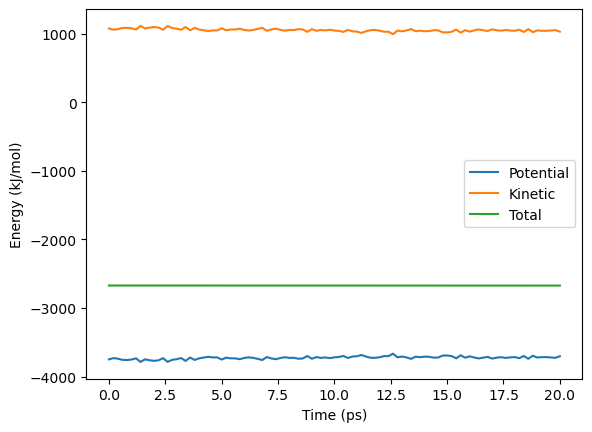

In [3]:
import numpy as np
from matplotlib import pylab as plt

nve_energy = np.loadtxt('gromacs/nve_energy.xvg', comments=['@','#'])
plt.xlabel('Time (ps)')
plt.ylabel('Energy (kJ/mol)')
plt.plot(nve_energy[:,0], nve_energy[:,1], label='Potential')
plt.plot(nve_energy[:,0], nve_energy[:,2], label='Kinetic')
plt.plot(nve_energy[:,0], nve_energy[:,3], label='Total')
plt.legend()

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Run two new simulations of the Ar liquid system using the $NPT$ and $NVT$ ensembles. Use the corresponding `grompp_npt.mdp` and `grompp_nvt.mdp` mdp files for each system to produce the needed tpr files with `gmx grompp` as explained above. Run the MD simulations using `gmx mdrun` as explained above. Adjust the `-deffnm` flag so that the files produced by each simulation don't conflict with the others.

Use the `gmx energy` tool to extract the energies, temperature, and pressure of the 3 simulated ensembles. Make separate plots comparing the 3 systems together with the following quantities:
    
    1. Kinetic energy.
    2. Potential energy.
    3. Total energy.
    4. Temperature.
    5. Pressure.

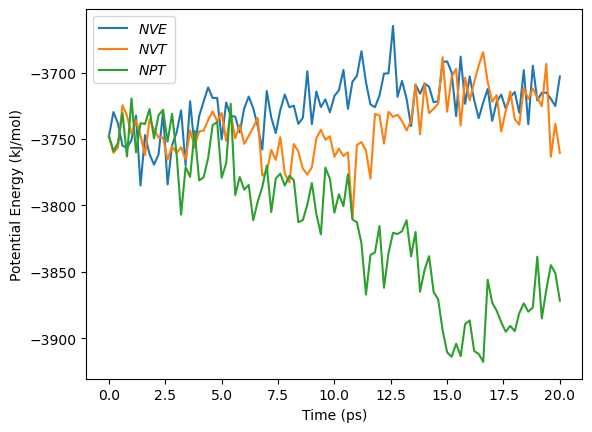

In [4]:
nvt_energy = np.loadtxt('gromacs/nvt_energy.xvg', comments=['@','#'])
npt_energy = np.loadtxt('gromacs/npt_energy.xvg', comments=['@','#'])

plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (kJ/mol)')
plt.plot(nve_energy[:,0], nve_energy[:,1], label='$NVE$')
plt.plot(nvt_energy[:,0], nvt_energy[:,1], label='$NVT$')
plt.plot(npt_energy[:,0], npt_energy[:,1], label='$NPT$')
plt.legend()

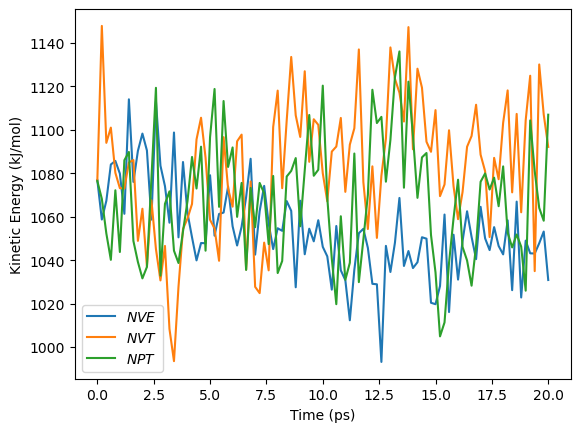

In [6]:
plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('Kinetic Energy (kJ/mol)')
plt.plot(nve_energy[:,0], nve_energy[:,2], label='$NVE$')
plt.plot(nvt_energy[:,0], nvt_energy[:,2], label='$NVT$')
plt.plot(npt_energy[:,0], npt_energy[:,2], label='$NPT$')
plt.legend()

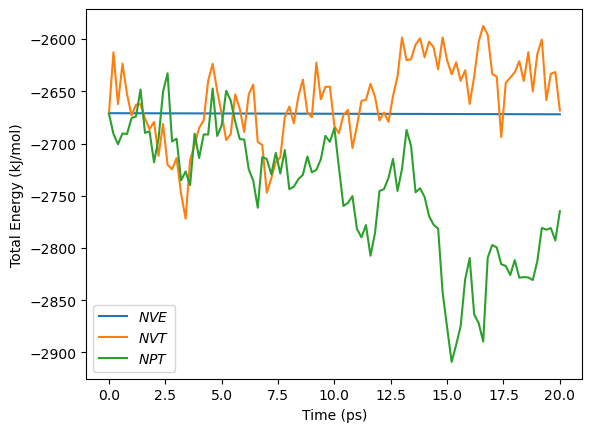

In [8]:
plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('Total Energy (kJ/mol)')
plt.plot(nve_energy[:,0], nve_energy[:,3], label='$NVE$')
plt.plot(nvt_energy[:,0], nvt_energy[:,3], label='$NVT$')
plt.plot(npt_energy[:,0], npt_energy[:,3], label='$NPT$')
plt.legend()

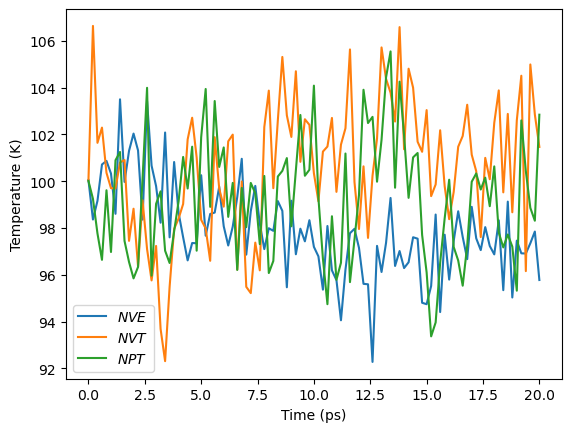

In [12]:
nve_temp_press = np.loadtxt('gromacs/nve_temp_press.xvg', comments=['@','#'])
nvt_temp_press = np.loadtxt('gromacs/nvt_temp_press.xvg', comments=['@','#'])
npt_temp_press = np.loadtxt('gromacs/npt_temp_press.xvg', comments=['@','#'])
plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.plot(nve_temp_press[:,0], nve_temp_press[:,1], label='$NVE$')
plt.plot(nvt_temp_press[:,0], nvt_temp_press[:,1], label='$NVT$')
plt.plot(npt_temp_press[:,0], npt_temp_press[:,1], label='$NPT$')
plt.legend()

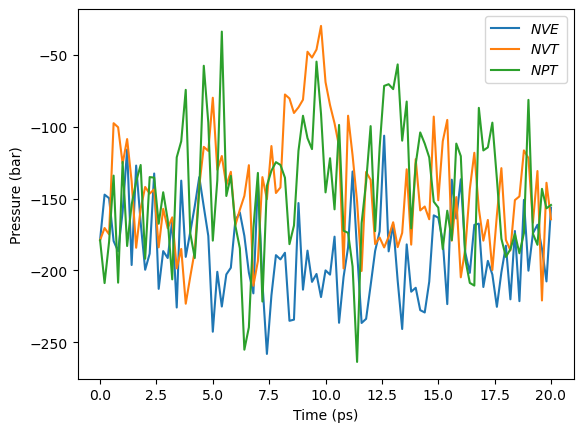

In [13]:
plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar)')
plt.plot(nve_temp_press[:,0], nve_temp_press[:,2], label='$NVE$')
plt.plot(nvt_temp_press[:,0], nvt_temp_press[:,2], label='$NVT$')
plt.plot(npt_temp_press[:,0], npt_temp_press[:,2], label='$NPT$')
plt.legend()

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Un-guided exploration. Modify the mdp files to change the settings of your simulated systems. What happens if you disable the settings of the initial velocity using the Maxwell-Boltzmann distribution? What happens if you set the temperature of the system to 40 K (below the melting temperature). Does the system freeze instantaneously?